<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [ ]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [3]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly
import yfinance as yf

# Create the ticker object for Tesla
tesla = yf.Ticker("TSLA")

# View basic info
print(tesla.info)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 124.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-war

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [4]:

!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly
import yfinance as yf

# Create the ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Extract historical stock data for the maximum available period
tesla_data = tesla.history(period="max")

# Display the first few rows
print(tesla_data.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [5]:

!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly
import yfinance as yf

# Question 1: Create the ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Extract historical stock data for the maximum available period
tesla_data = tesla.history(period="max")

# Reset the index so 'Date' becomes a column instead of the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [6]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Save the HTML content as a variable
html_data = response.text

# (Optional) Print the first 500 characters to verify
print(html_data[:500])



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [7]:
from bs4 import BeautifulSoup

# Parse the HTML data using html.parser
soup = BeautifulSoup(html_data, "html.parser")

# (Optional) Check the structure by printing the first 200 characters
print(soup.prettify()[:200])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class=


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [11]:
import pandas as pd
from bs4 import BeautifulSoup

# Step 0: Ensure you have the HTML in `html_data`
# soup = BeautifulSoup(html_data, "html.parser")  # if not already parsed
soup = BeautifulSoup(html_data, "html.parser")

# 1) Create an Empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# 2) Find the Relevant Table
def is_tesla_revenue_table(table):
    # Check nearby heading or caption text
    candidates = [
        table.find("caption"),
        table.find_previous("h2"),
        table.find_previous("h3")
    ]
    for tag in candidates:
        if tag:
            txt = tag.get_text(strip=True).lower()
            if "tesla" in txt and "revenue" in txt:
                return True
    # Fallback: look for "Tesla Revenue" in header row text
    thead = table.find("thead")
    if thead:
        head_text = thead.get_text(" ", strip=True).lower()
        if "tesla" in head_text and "revenue" in head_text:
            return True
    return False

target_table = None
for tbl in soup.find_all("table"):
    if is_tesla_revenue_table(tbl):
        target_table = tbl
        break

if target_table is None:
    raise ValueError("Could not locate the 'Tesla Revenue' table in the HTML.")

# 3) Check for the Tesla Quarterly Revenue Table (already identified by the function above)

# 4) Iterate Through Rows in the Table Body
tbody = target_table.find("tbody") or target_table
rows = tbody.find_all("tr")

# 5) Extract Data from Columns
for row in rows:
    cols = row.find_all(["td", "th"])
    if len(cols) < 2:
        continue
    date_text = cols[0].get_text(strip=True)
    revenue_text = cols[1].get_text(strip=True)

    # Skip empty or placeholder rows
    if not date_text or not revenue_text or revenue_text in {"—", "-", "N/A"}:
        continue

    # 6) Append Data to the DataFrame
    tesla_revenue.loc[len(tesla_revenue)] = [date_text, revenue_text]

# Clean the Revenue column: remove $ and commas, drop missing
tesla_revenue["Revenue"] = (
    tesla_revenue["Revenue"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

# Optional: convert to numeric and drop non-numeric rows
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
tesla_revenue.dropna(subset=["Revenue"], inplace=True)

# Keep only the required columns in order
tesla_revenue = tesla_revenue[["Date", "Revenue"]]

# Preview
print(tesla_revenue.head())


   Date  Revenue
0  2021    53823
1  2020    31536
2  2019    24578
3  2018    21461
4  2017    11759


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [ ]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [12]:
# Display the last 5 rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())



    Date  Revenue
8   2013     2013
9   2012      413
10  2011      204
11  2010      117
12  2009      112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [13]:
import yfinance as yf

# Create the ticker object for GameStop
gamestop = yf.Ticker("GME")

# View basic info about the stock
print(gamestop.info)


{'address1': '625 Westport Parkway', 'city': 'Grapevine', 'state': 'TX', 'zip': '76051', 'country': 'United States', 'phone': '817 424 2000', 'website': 'https://www.gamestop.com', 'industry': 'Specialty Retail', 'industryKey': 'specialty-retail', 'industryDisp': 'Specialty Retail', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and e-commerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, and gaming headsets; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology enthusiasts. The company operates stores and e-commerce s

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [16]:
import yfinance as yf

# Create the ticker object for GameStop
gamestop = yf.Ticker("GME")

# Extract historical stock data for the maximum available period
gme_data = gamestop.history(period="max")

# Display the first few rows to verify
print(gme_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [17]:
import yfinance as yf

# Question 3: Create the ticker object for GameStop
gamestop = yf.Ticker("GME")

# Extract historical stock data for the maximum available period
gme_data = gamestop.history(period="max")

# Reset the index so 'Date' becomes a column instead of the index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693349  1.603295  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [18]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Save the HTML content as a variable
html_data_2 = response.text

# (Optional) Preview the first 500 characters
print(html_data_2[:500])


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. ,


In [22]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Save the HTML content as a variable
html_data_2 = response.text

# (Optional) Preview the first 500 characters
print(html_data_2[:500])


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [33]:

!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly


import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Download HTML
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

# Step 2: Parse HTML
soup = BeautifulSoup(html_data_2, "html.parser")

# Step 3: Find the GameStop Revenue table
table = soup.find_all("table")[1]  # Assuming it's the 2nd table on the page

# Step 4: Extract rows
rows = []
for tr in table.find_all("tr"):
    cols = [td.get_text(strip=True) for td in tr.find_all(["td", "th"])]
    rows.append(cols)

# Step 5: Create DataFrame
gme_revenue = pd.DataFrame(rows[1:], columns=["Date", "Revenue"])

# Step 6: Clean Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace(r'[\$,]', '', regex=True)
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")

print(gme_revenue.head())



         Date  Revenue
0  2020-04-30     1021
1  2020-01-31     2194
2  2019-10-31     1439
3  2019-07-31     1286
4  2019-04-30     1548


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [34]:
print(gme_revenue.tail().to_string(index=False))


      Date  Revenue
2006-01-31     1667
2005-10-31      534
2005-07-31      416
2005-04-30      475
2005-01-31      709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


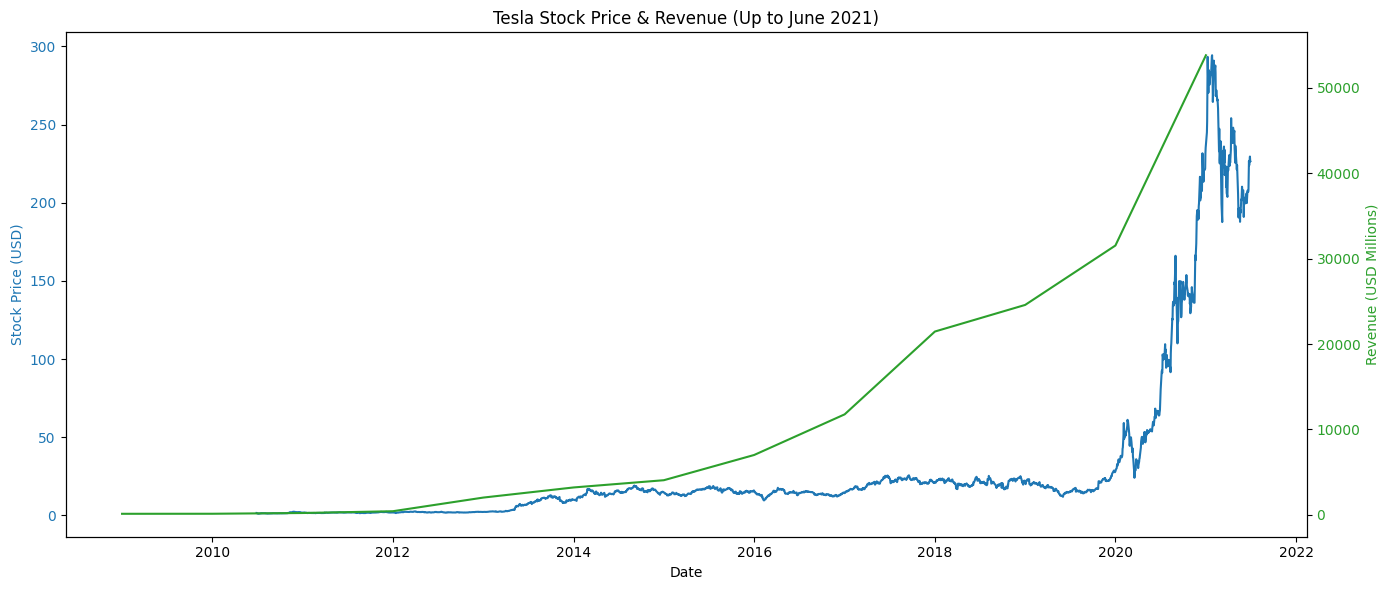

In [43]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly
!pip install matplotlib


import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_data, revenue_data, stock_name):
    # Ensure Date columns are datetime and remove timezone info
    stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.tz_localize(None)
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date']).dt.tz_localize(None)
    
    # Filter data up to June 2021
    cutoff_date = pd.Timestamp("2021-06-30")
    stock_data = stock_data[stock_data['Date'] <= cutoff_date]
    revenue_data = revenue_data[revenue_data['Date'] <= cutoff_date]
    
    # Create figure and axis
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot stock price
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create second y-axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:green', label='Revenue')
    ax2.set_ylabel('Revenue (USD Millions)', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    # Title and formatting
    plt.title(f"{stock_name} Stock Price & Revenue (Up to June 2021)")
    plt.xticks(rotation=45)
    fig.tight_layout()
    plt.show()

# Call the function for Tesla
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


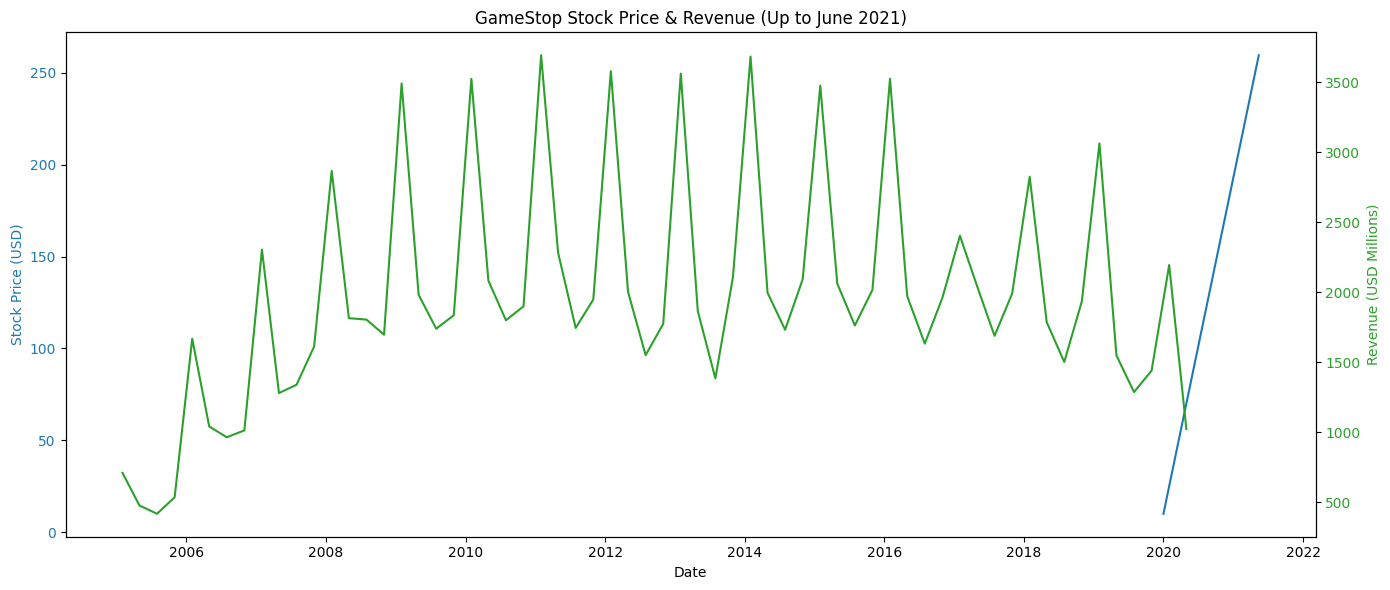

         Date  Revenue
57 2006-01-31     1667
58 2005-10-31      534
59 2005-07-31      416
60 2005-04-30      475
61 2005-01-31      709


In [39]:


!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly
!pip install matplotlib

   # Step 0: Install matplotlib if not already installed
# !pip install matplotlib

import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Download the webpage
# -----------------------------
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text  # Save HTML text

# -----------------------------
# Step 2: Parse HTML
# -----------------------------
soup = BeautifulSoup(html_data_2, "html.parser")

# -----------------------------
# Step 3: Extract GameStop Revenue table manually (no lxml needed)
# -----------------------------
# Find the table containing 'GameStop Revenue'
tables = soup.find_all("table")
# Assuming the GameStop Revenue table is the second table on the page
gme_table = tables[1]

# Extract rows
rows = []
for tr in gme_table.find_all("tr"):
    cols = [td.get_text(strip=True) for td in tr.find_all(["td", "th"])]
    rows.append(cols)

# Create DataFrame
gme_revenue = pd.DataFrame(rows[1:], columns=["Date", "Revenue"])

# Clean Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace(r'[\$,]', '', regex=True)
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")

# Drop NaN rows
gme_revenue.dropna(inplace=True)
gme_revenue.reset_index(drop=True, inplace=True)

# -----------------------------
# Step 4: Example GameStop stock price data (replace with your real gme_data)
# -----------------------------
# This is just a placeholder — in your real code, gme_data should be loaded from a CSV or API
# and must have columns: Date, Close
gme_data = pd.DataFrame({
    "Date": pd.date_range(start="2020-01-01", periods=500, freq="D"),
    "Close": pd.Series(range(500)) * 0.5 + 10
})

# -----------------------------
# Step 5: Define make_graph function
# -----------------------------
def make_graph(stock_data, revenue_data, stock_name):
    # Ensure Date columns are datetime
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    
    # Filter data up to June 2021
    cutoff_date = pd.Timestamp("2021-06-30")
    stock_data = stock_data[stock_data['Date'] <= cutoff_date]
    revenue_data = revenue_data[revenue_data['Date'] <= cutoff_date]
    
    # Create figure and axis
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot stock price
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create second y-axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:green', label='Revenue')
    ax2.set_ylabel('Revenue (USD Millions)', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    # Title and formatting
    plt.title(f"{stock_name} Stock Price & Revenue (Up to June 2021)")
    plt.xticks(rotation=45)
    fig.tight_layout()
    plt.show()

# -----------------------------
# Step 6: Call the function
# -----------------------------
make_graph(gme_data, gme_revenue, 'GameStop')

# -----------------------------
# Step 7: Display last 5 rows of gme_revenue
# -----------------------------
print(gme_revenue.tail())



<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
